In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
# Step 1: Load the dataset
# You can download the dataset from: https://exoplanetarchive.ipac.caltech.edu
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+pscomppars&format=csv"
data = pd.read_csv(url)

In [56]:
data.shape

(5788, 682)

In [57]:
data.head()

,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,...,cb_flag,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_angsep_reflink,pl_ndispec
0,3.12508,OGLE-2016-BLG-1227L b,b,2.104385,OGLE-2016-BLG-1227L,NaN,NaN,NaN,2020-03,2020,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3.24410,Kepler-1065 b,b,2.430631,Kepler-1065,NaN,NaN,TIC 378012771,2016-05,2016,...,0,0.0405,NaN,NaN,0.0,NaN,0.0405,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0
2,3.11091,HD 132406 b,b,2.573350,HD 132406,HD 132406,HIP 73146,TIC 309808219,2007-10,2007,...,0,28.0000,NaN,NaN,0.0,NaN,28.0000,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0
3,3.12740,TOI-1260 c,c,2.572931,TOI-1260,NaN,NaN,TIC 355867695,2021-08,2021,...,0,0.8930,NaN,NaN,0.0,NaN,0.8930,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0
4,3.11122,HD 149143 b,b,2.579040,HD 149143,HD 149143,HIP 81022,TIC 281520119,2006-02,2005,...,0,0.7230,NaN,NaN,0.0,NaN,0.7230,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0


In [58]:
data.describe()

,objectid,hostid,disc_year,ra,raerr1,raerr2,rasymerr,ra_solnid,dec,decerr1,...,htm20,cb_flag,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_ndispec
count,5788.000000,5788.000000,5788.000000,5788.000000,5.548000e+03,5.548000e+03,5788.000000,5788.000000,5788.000000,5.548000e+03,...,5.788000e+03,5788.000000,5479.000000,0.0,0.0,5479.0,0.0,5479.000000,0.0,5788.000000
mean,3.265326,2.433088,2016.458017,235.065873,2.626566e-07,-2.626566e-07,0.958535,4399.881178,19.233123,2.857603e-07,...,3.068687e+07,0.008293,485.641720,NaN,NaN,0.0,NaN,485.641720,NaN,0.006565
std,0.216965,0.179360,4.673194,90.915464,4.763982e-06,4.763982e-06,0.199381,244.438981,36.289993,5.156894e-06,...,1.265024e+09,0.090695,14303.188523,NaN,NaN,0.0,NaN,14303.188523,NaN,0.164054
min,3.100000,2.100330,1992.000000,0.185606,0.000000e+00,-1.630689e-04,0.000000,1.100000,-88.121111,0.000000e+00,...,-2.145840e+09,0.000000,0.003530,NaN,NaN,0.0,NaN,0.003530,NaN,0.000000
25%,3.121408,2.311190,2014.000000,178.577997,5.144056e-09,-1.079456e-08,1.000000,4400.100000,-9.147098,5.686111e-09,...,-1.071050e+09,0.000000,0.112000,NaN,NaN,0.0,NaN,0.112000,NaN,0.000000
50%,3.176050,2.501804,2016.000000,285.492165,6.840694e-09,-6.840694e-09,1.000000,4400.100000,39.680574,7.206611e-09,...,4.225060e+05,0.000000,0.268000,NaN,NaN,0.0,NaN,0.268000,NaN,0.000000
75%,3.328525,2.567355,2020.000000,293.385924,1.079456e-08,-5.144056e-09,1.000000,4400.100000,45.495327,9.642750e-09,...,1.170580e+09,0.000000,1.310000,NaN,NaN,0.0,NaN,1.310000,NaN,0.000000
max,3.999000,2.999700,2024.000000,359.974984,1.630689e-04,0.000000e+00,1.000000,5507.120000,86.860343,1.630689e-04,...,2.147324e+09,1.000000,689000.000000,NaN,NaN,0.0,NaN,689000.000000,NaN,6.000000


In [59]:
# Step 2: Data Preprocessing
# Keep only relevant columns and drop rows with missing values
columns_to_use = ['pl_orbper', 'pl_rade', 'st_teff', 'st_mass', 'pl_orbeccen']
data = data[columns_to_use].dropna()

# Rename columns for clarity
data.columns = ['Orbital Period (days)', 'Planet Radius (Earth radii)', 'Stellar Temperature (K)', 
                'Stellar Mass (Solar masses)', 'Orbital Eccentricity']

In [60]:
# Define habitability (based on a simple rule for this example)
def is_habitable(row):
    # Habitability based on orbital period and stellar temperature
    if 0.5 <= row['Orbital Period (days)'] <= 5 and 3200 <= row['Stellar Temperature (K)'] <= 5700:
        return 1  # Habitable
    else:
        return 0  # Not Habitable

data['Habitability'] = data.apply(is_habitable, axis=1)

all_features = ['Orbital Period (days)', 'Planet Radius (Earth radii)', 'Stellar Temperature (K)', 
                'Stellar Mass (Solar masses)', 'Orbital Eccentricity', 'Habitability']
feature_names = ['Orbital Period (days)', 'Planet Radius (Earth radii)', 'Stellar Temperature (K)', 
          'Stellar Mass (Solar masses)', 'Orbital Eccentricity']

# Features and target
X = data[feature_names]
y = data['Habitability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

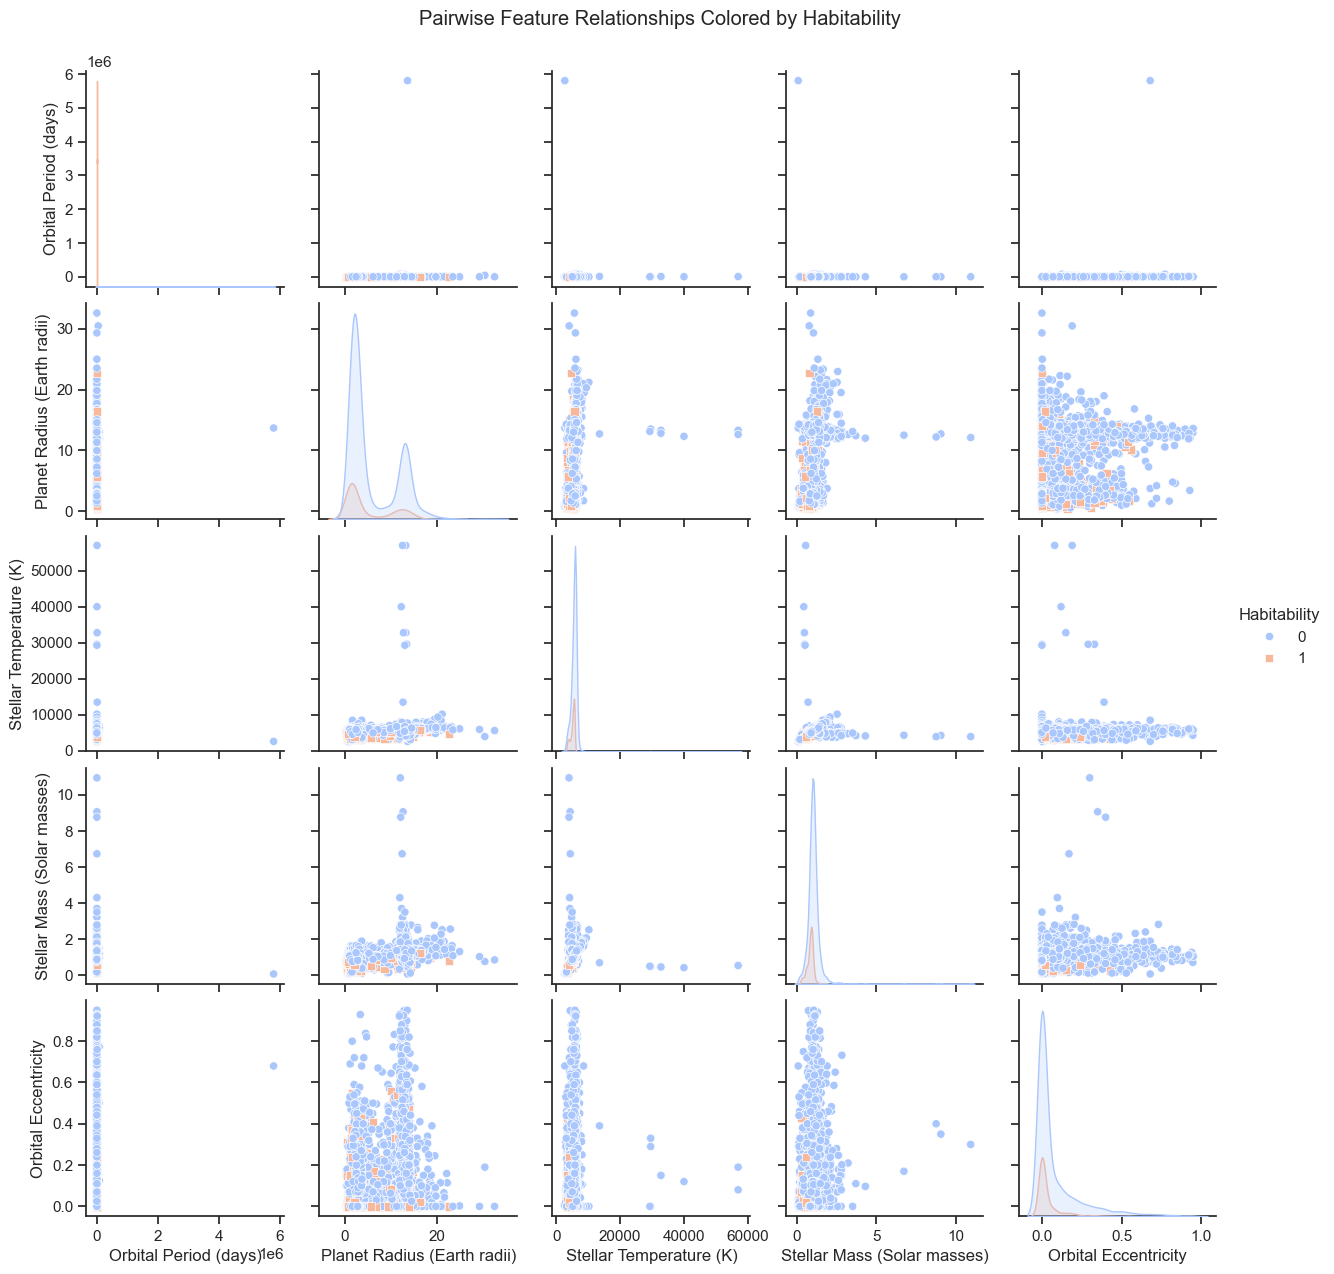

In [62]:

data_subset = data[all_features]

# Create a Pairplot
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(data_subset, hue='Habitability', palette='coolwarm', diag_kind='kde', markers=["o", "s"])
pair_plot.fig.suptitle("Pairwise Feature Relationships Colored by Habitability", y=1.02)
plt.show()

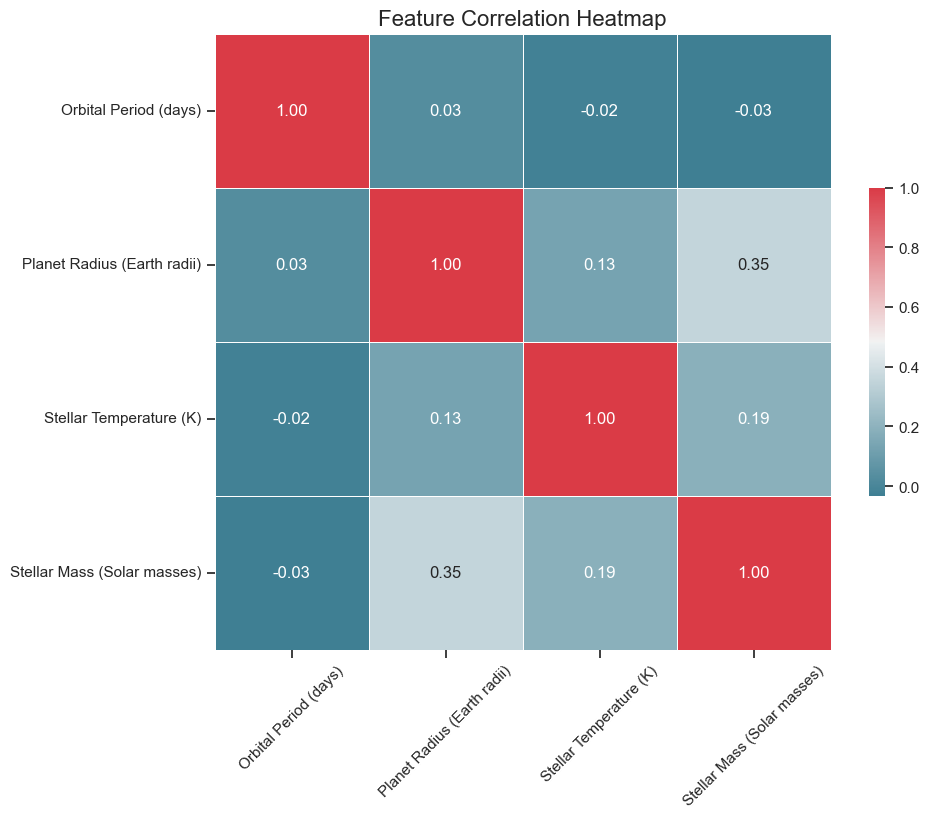

In [63]:
# Compute the correlation matrix
corr_matrix = data[feature_names[:-1]].corr()  # Exclude 'Habitability' for correlation

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=.5, square=True, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Random Forest - Accuracy: 0.9979757085020243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       0.99      1.00      0.99       148

    accuracy                           1.00       988
   macro avg       0.99      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988


SVM - Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       840
           1       0.73      0.74      0.74       148

    accuracy                           0.92       988
   macro avg       0.84      0.85      0.85       988
weighted avg       0.92      0.92      0.92       988


Neural Network (MLP) - Accuracy: 0.7135627530364372
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       840
           1       0.34      1.00      0.51       148

    accuracy                           0.71    

C:\Users\s3nt1\AppData\Local\Temp\ipykernel_30536\4239914412.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


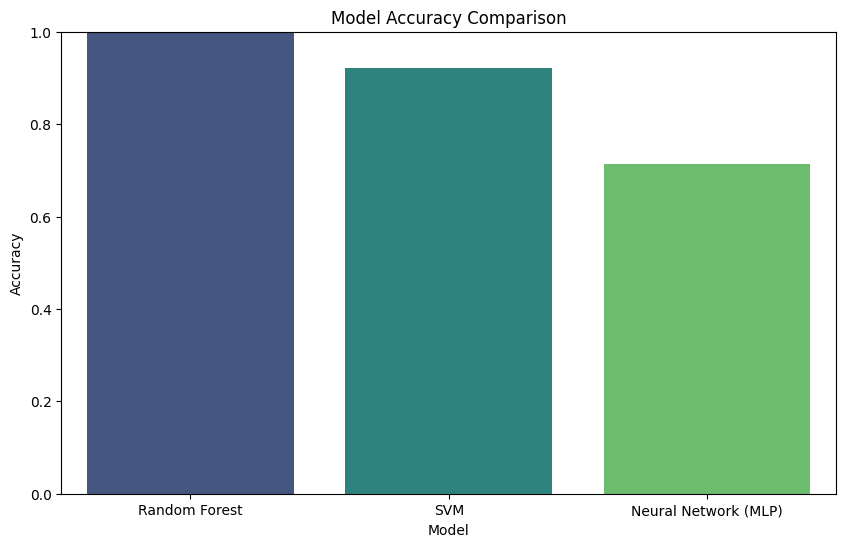

In [41]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_rep
    }

    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Plotting the comparison of model accuracies
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

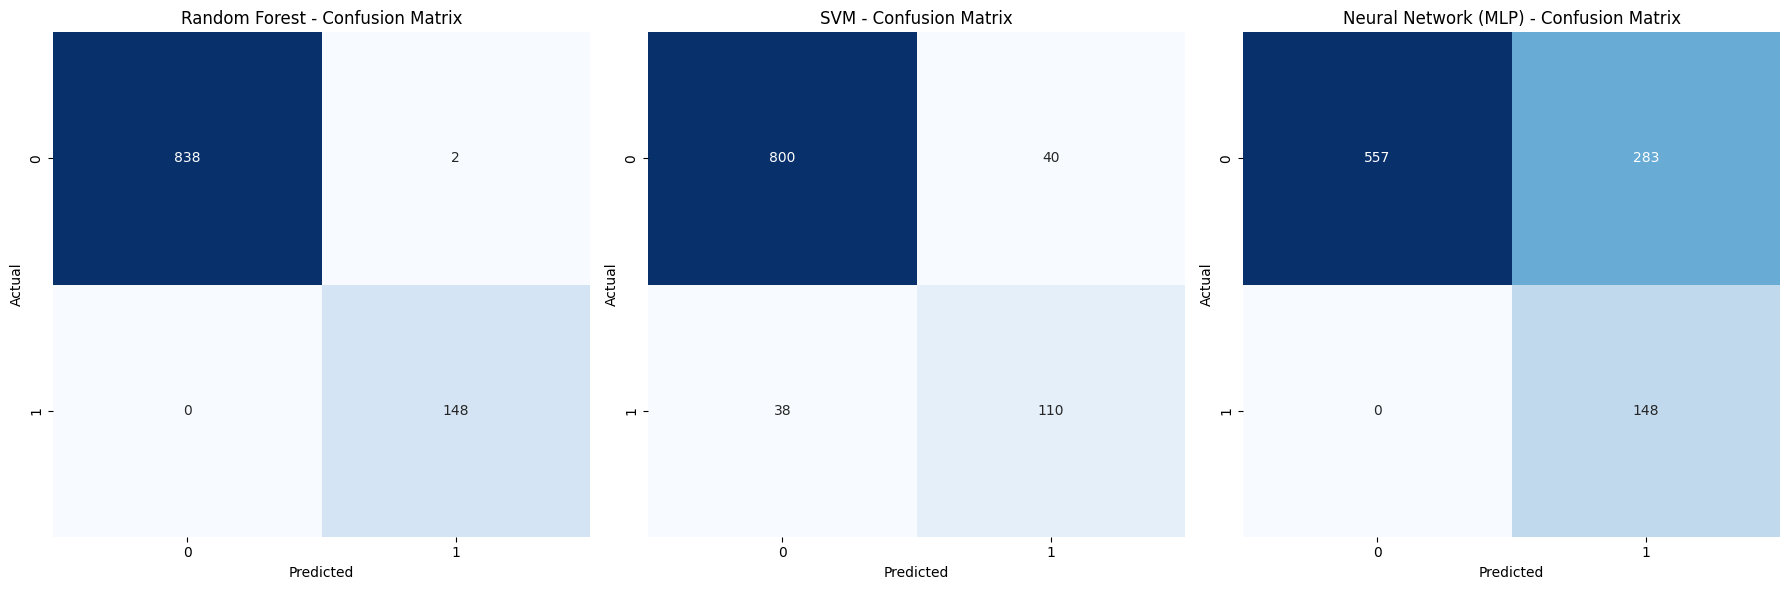

In [43]:
# Visualizing confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, model_name in enumerate(model_names):
    cm = confusion_matrix(y_test, models[model_name].predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False)
    axs[i].set_title(f'{model_name} - Confusion Matrix')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Random Forest

In [44]:
def plot_feature_importance(feature_names, importances, model_name):
    sorted_indices = np.argsort(importances)[::-1]
    sorted_features = np.array(feature_names)[sorted_indices]
    sorted_importances = importances[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances, color="skyblue")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"{model_name} Feature Importance")
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.show()

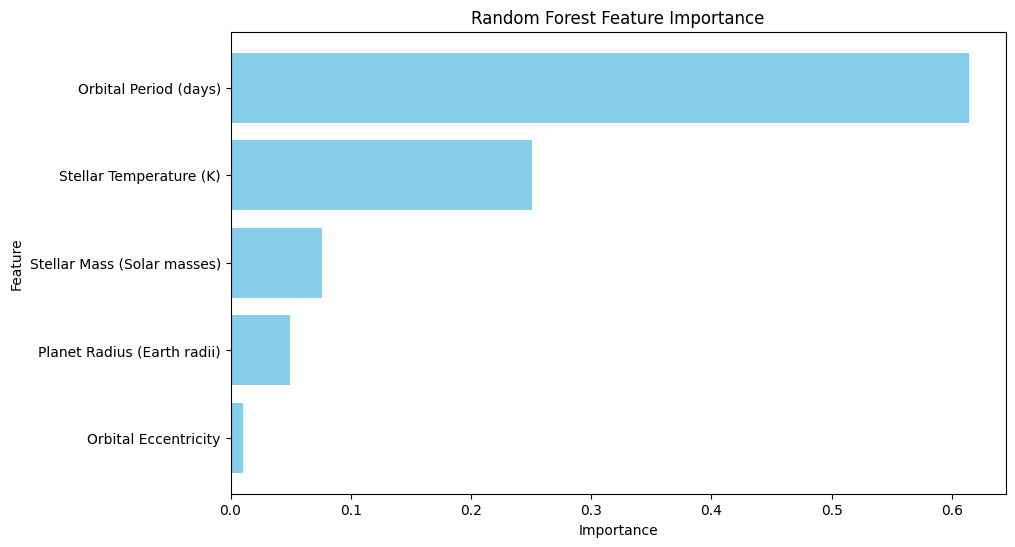

In [50]:
# Random Forest Feature Importance
rf_importances = models['Random Forest'].feature_importances_
plot_feature_importance(feature_names, rf_importances, "Random Forest")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       0.99      1.00      0.99       148

    accuracy                           1.00       988
   macro avg       0.99      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988

Confusion Matrix:
 [[838   2]
 [  0 148]]


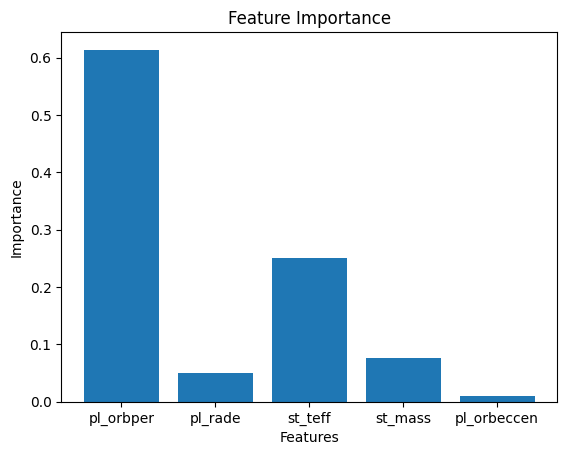

In [14]:
# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Feature Importance
feature_importance = model.feature_importances_
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


### SVM

### Neural Network